# Demo 4: Classification with Decision tree model

# Read Data

In [1]:
from sklearn import datasets
# Load data
digits = datasets.load_digits()

# Task 1: Visuallization

# Task 2: Training the model

In [2]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
X = data/16
y = digits.target
# Train test split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [3]:
# Create a Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=24)
# Training model:
tree_clf.fit(X_train,y_train)
# Predict on test set:
pred_test = tree_clf.predict(X_test)



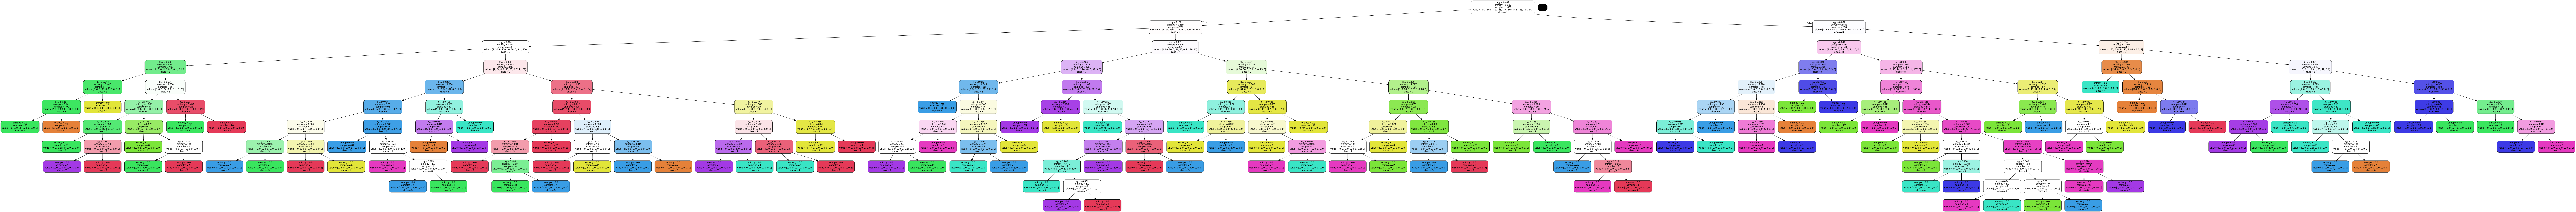

In [8]:
# Plot the decision tree graph
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
dot_data = StringIO()
export_graphviz(tree_clf,
                out_file=dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                class_names=[f"{i}" for i in range(10)])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Tree_Classifier_Digits.png")
Image(graph.create_png())

In [9]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {tree_clf}:\n"
      f"{metrics.classification_report(y_test,pred_test,digits=4)}\n")

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=24):
              precision    recall  f1-score   support

           0     0.9189    0.9714    0.9444        35
           1     0.7097    0.6111    0.6567        36
           2     0.7714    0.7714    0.7714        35
           3     0.7000    0.5676    0.6269        37
           4     0.7838    0.7838    0.7838        37
           5     0.7907    0.9189    0.8500        37
           6     0.9714    0.9189    0.9444        37
           7     0.7209    0.8611    0.7848        36
           8     0.7647    0.7879    0.7761        33
           9     0.6857    0.6486    0.6667        37

    accuracy                         0.7833       360
   macro avg     0.7817    0.7841    0.7805       360
weighted avg     0.7816    0.7833    0.7800       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 22  0  2  2  0  0  1  1  8]
 [ 1  2 27  1  0  0  0  3  0  1]
 [ 0  3  4 21  0  4  0  1  3  1]
 [ 0  0  0  0 29  1  1  4  1  1]
 [ 0  1  0  1  1 34  0  0  0  0]
 [ 0  1  0  0  1  0 34  0  1  0]
 [ 0  0  2  0  1  0  0 31  2  0]
 [ 0  1  1  1  0  3  0  1 26  0]
 [ 2  1  1  4  2  1  0  2  0 24]]


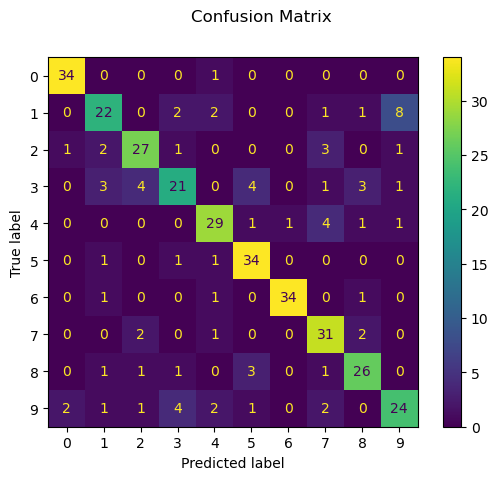

In [11]:
# Confusion matrix
import matplotlib.pyplot as plt
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Task 3: Comparision of different criterias in decision tree
Splitting criteria in decision tree are used to determine how to partition the data at each notd of the tree. Three common splitting criterias: Entropy, Gini Impurity, Mean Squared Error (MSE)

In [12]:
def evaluation_model(model,
                     X_train,
                     y_train,
                     X_test,
                     y_test):
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    report = metrics.classification_report(y_test,pred_test,digits = 4, output_dict = True)
    return (report['macro avg'],report['weighted avg'])

In [13]:
marco_avg_all = {}
weighted_avg_all = {}
models = [DecisionTreeClassifier(criterion = "entropy",max_depth = 20),
          DecisionTreeClassifier(criterion = 'gini', max_depth = 20),
          DecisionTreeClassifier(criterion = 'log_loss', max_depth= 20)]
criterions = ["Entropy",
              "Gini",
              "Log_loss"]
for i in range(len(models)):
    result = evaluation_model(model=models[i],
                              X_train=X_train,
                              y_train=y_train,
                              X_test=X_test,
                              y_test=y_test)
    marco_avg_all[criterions[i]] = result[0]
    weighted_avg_all[criterions[i]] = result[1]

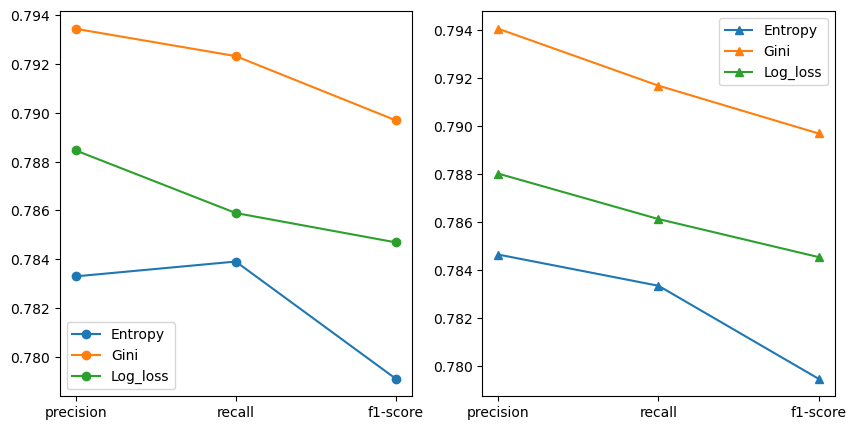

In [16]:
# Plot results
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
X = list(marco_avg_all["Entropy"].keys())[:3]
fig,axes = plt.subplots(nrows = 1, ncols = 2,
                      figsize = (10,5))
for type in criterions:
    axes[0].plot(X,
                   np.array([i for i in marco_avg_all[type].values()])[:3],
                   marker = 'o',
                   label = type)
    axes[1].plot(X,
                   np.array([i for i in weighted_avg_all[type].values()])[:3],
                   marker = "^",
                   label = type)
axes[0].legend(frameon = True)
axes[1].legend(frameon = True)
plt.show()


# Select the best criteria:
-   Splitting criteria: Gini Impurity